In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
from sklearn.cluster import KMeans
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
df = pd.read_csv('train.csv')
test_original = pd.read_csv('test.csv')
y_test_original = pd.read_csv('test_salaries.csv')

In [ ]:
df.head()

In [38]:
#Division en TRAIN = X_train y VALIDATION = X_test
X = df.drop(['Salary'], axis=1)

y = df['Salary']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=382)

print(X_train.shape[0], X_test.shape[0],test_original.shape[0])

489 123 262


# Analisis de Variables

In [76]:
#Busco NA
#Observaciones con mas de 1 NA
X_train.isnull().sum()[X_train.isnull().sum()>1]

Pr/St      112
DftYr       79
DftRd       79
Ovrl        79
SH           2
PDO          2
iCF          5
iFF          5
iSF          5
iRB          5
iDS          4
sDist.1     10
iHA          6
iHDf         5
GS/G         2
dtype: int64

In [78]:
X_train.loc[X_train['Pr/St'].isnull()]

,Born,City,Pr/St,Cntry,Nat,Ht,Wt,DftYr,DftRd,Ovrl,...,PEND,OPS,DPS,PS,OTOI,Grit,DAP,Pace,GS,GS/G
450,94-06-06,Oulu,NaN,FIN,FIN,73,186,2015.000,7.000,189.000,...,43.000,-0.100,2.300,2.200,2474.780,80,15.000,107.200,9.700,0.150
521,89-05-08,Rodovre,NaN,DNK,DNK,74,207,2007.000,1.000,13.000,...,62.000,0.900,1.700,2.600,3365.720,137,5.700,108.200,37.400,0.460
139,83-04-01,Kalajoki,NaN,FIN,FIN,71,198,2001.000,6.000,192.000,...,72.000,1.000,1.000,1.900,2882.130,101,3.200,111.400,32.200,0.470
170,93-03-01,Leksand,NaN,SWE,SWE,74,200,2011.000,2.000,42.000,...,72.000,2.700,1.400,4.200,3312.900,92,12.000,113.900,45.100,0.560
257,93-02-25,Cesk_ Budejovice,NaN,CZE,CZE,72,203,2011.000,6.000,158.000,...,36.000,0.600,1.000,1.600,2583.160,120,8.100,105.300,18.300,0.290
202,82-02-14,Trencin,NaN,SVK,SVK,73,205,2000.000,1.000,3.000,...,43.000,1.100,1.100,2.200,2291.810,54,3.100,112.700,32.700,0.580
376,90-01-30,Ozieri,NaN,ITA,CHE,74,209,2008.000,1.000,19.000,...,81.000,-0.300,4.000,3.700,3046.770,294,9.900,103.100,8.300,0.100
48,97-01-13,Yaroslavl,NaN,RUS,RUS,73,201,2015.000,1.000,7.000,...,97.000,1.700,3.900,5.700,3080.320,311,8.900,107.300,35.300,0.430
346,87-12-23,Helsinki,NaN,FIN,FIN,74,212,2008.000,3.000,65.000,...,53.000,0.500,0.900,1.400,2690.350,127,5.300,106.100,21.200,0.330
222,94-05-16,Khabarovsk,NaN,RUS,RUS,75,209,2012.000,1.000,12.000,...,39.000,0.700,0.900,1.600,3189.370,71,6.900,103.900,16.100,0.220


In [109]:
#X_train['Pr/St']
ciudades = df.groupby('Pr/St')
ciudades_cant = ciudades.size()
ciudades_cant = pd.DataFrame(ciudades_cant,columns=["ciudad","cant"])
#a = list(range(36))
#a =pd.DataFrame(a,columns=["nro"])
#ciudades_cant = pd.append([a,ciudades_cant], axis=0 )

ValueError: Shape of passed values is (1, 37), indices imply (2, 37)

In [106]:
ciudades_cant

Pr/St
AB     42
AK      1
AL      1
AZ      3
BC     29
CA      7
CO      3
CT      6
FL      5
IL     10
IN      2
MA     18
MB     19
ME      1
MI     27
MN     26
MO      2
NC      1
ND      1
NE      1
NH      2
NJ      4
NL      1
NS      5
NY     21
OH      1
OK      1
ON    136
PA      5
PE      2
QC     35
RI      1
SK     22
TX      4
UT      1
WA      1
WI     12
dtype: int64

In [87]:
a = range(36)
a

range(0, 36)

In [69]:
X_train['DftYr'].describe()

count    410.000
mean    2008.798
std        4.428
min     1990.000
25%     2006.000
50%     2010.000
75%     2012.000
max     2016.000
Name: DftYr, dtype: float64

/anaconda3/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1874: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1881: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1889: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1890: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1b437550>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1b437da0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1b509cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1b440630>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b440a58>],
 'means': []}

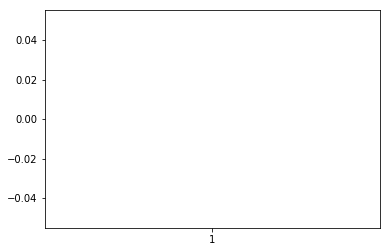

In [70]:
plt.boxplot(X_train.DftYr)